## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")


#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Check number of unique values for each column
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Check the value_counts for SPECIAL_CONSIDERATIONS
application_df["SPECIAL_CONSIDERATIONS"].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [5]:
# Check the value_counts for IS_SUCCESSFUL when SPECIAL_CONSIDERATIONS are True (value = Y)
spec_cons_df = application_df[application_df["SPECIAL_CONSIDERATIONS"]=="Y"]
spec_cons_df["IS_SUCCESSFUL"].value_counts()

1    17
0    10
Name: IS_SUCCESSFUL, dtype: int64

In [6]:
# Check the value_counts for IS_SUCCESSFUL when SPECIAL_CONSIDERATIONS are False (value = N)
spec_cons_df_2 = application_df[application_df["SPECIAL_CONSIDERATIONS"]=="N"]
spec_cons_df_2["IS_SUCCESSFUL"].value_counts()

1    18244
0    16028
Name: IS_SUCCESSFUL, dtype: int64

In [7]:
application_df["STATUS"].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [8]:
# Check the value_counts for IS_SUCCESSFUL when STATUS = 0
df_status = application_df[application_df["STATUS"]=="0"]
df_status["IS_SUCCESSFUL"].value_counts()

Series([], Name: IS_SUCCESSFUL, dtype: int64)

In [9]:
# Check the value_counts for IS_SUCCESSFUL when STATUS = 1
df_status_2 = application_df[application_df["STATUS"]=="1"]
df_status_2["IS_SUCCESSFUL"].value_counts()

Series([], Name: IS_SUCCESSFUL, dtype: int64)

In [10]:
# Drop the non-beneficial ID columns, 'EIN' and 'STATUS'.
application_df = application_df.drop(columns = ["EIN","STATUS"])
application_df


,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,0,N,5000,1


In [11]:
# Review the data type information
application_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 2.6+ MB


In [12]:
# Determine the number of unique values in each column.
application_df.apply(pd.Series.nunique)


NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [13]:
# Look at APPLICATION_TYPE value counts for binning

application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

# Choose a cutoff value and create a list of classifications to replace with 'Other'
cutoff_value = 500
application_types_to_replace = list(application_type_counts[application_type_counts < cutoff_value].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"OTHER")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()




T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
OTHER      276
Name: APPLICATION_TYPE, dtype: int64

In [15]:
# Look at CLASSIFICATION value counts for binning

classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [16]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_2 = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].
                                                                          value_counts() > 1]
classification_counts_2


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [17]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

# Choose a cutoff value and create a list of classifications to replace with 'Other'
cutoff_value = 300
classifications_to_replace = list(classification_counts[classification_counts < cutoff_value].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"OTHER")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()




C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
OTHER     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [18]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

application_df


,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,NAME_146TH ALUMNI ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,108590,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,5000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6692,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,142590,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,5000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,5000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,5000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
print(application_df.shape)

(34299, 19612)


In [20]:
# Reorder columns to place "IS_SUCCESSFUL" as the last column
# application_df = application_df.[[]]

application_df = application_df[[col for col in application_df if col != 'IS_SUCCESSFUL'] + ['IS_SUCCESSFUL']]


In [21]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Columns: 19612 entries, ASK_AMT to IS_SUCCESSFUL
dtypes: int64(2), uint8(19610)
memory usage: 642.0 MB


In [22]:
# Split our preprocessed data into our features and target arrays
# Convert input to numpy array
np_application_df = application_df.to_numpy()

X_data = np_application_df[:,0:19611]
y_data= np_application_df[:,19611]

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split( X_data, y_data, random_state=1)
  

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

from tensorflow import keras


number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 32
hidden_nodes_layer2 = 32

model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer1, 
    input_dim=number_input_features, 
    activation="relu"))

# Second hidden layer
model.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"))

# Output layer
model.add(tf.keras.layers.Dense(
    units=1, 
    activation="sigmoid"))

# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                627584    
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 628,673
Trainable params: 628,673
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [26]:
# Compile the model with a random seed
tf.random.set_seed(42)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Training Progress:
------------------------------------
Epoch 1/30
644/644 [==============================] - 6s 8ms/step - loss: 0.4970 - accuracy: 0.7588 - val_loss: 0.4463 - val_accuracy: 0.7965
Epoch 2/30
644/644 [==============================] - 3s 4ms/step - loss: 0.1744 - accuracy: 0.9348 - val_loss: 0.8199 - val_accuracy: 0.6017
Epoch 3/30
644/644 [==============================] - 3s 4ms/step - loss: 0.1017 - accuracy: 0.9582 - val_loss: 0.8696 - val_accuracy: 0.6086
Epoch 4/30
644/644 [==============================] - 3s 4ms/step - loss: 0.0959 - accuracy: 0.9613 - val_loss: 0.8871 - val_accuracy: 0.6105
Epoch 5/30
644/644 [==============================] - 3s 4ms/step - loss: 0.0934 - accuracy: 0.9619 - val_loss: 0.7597 - val_accuracy: 0.6371
Epoch 6/30
644/644 [==============================] - 3s 4ms/step - loss: 0.0931 - accuracy: 0.9613 - val_loss: 0.7233 - val_accuracy: 0.6523
Epoch 7/30
644/644 [==============================] - 3s 5ms/step - loss: 0.0917 - accuracy

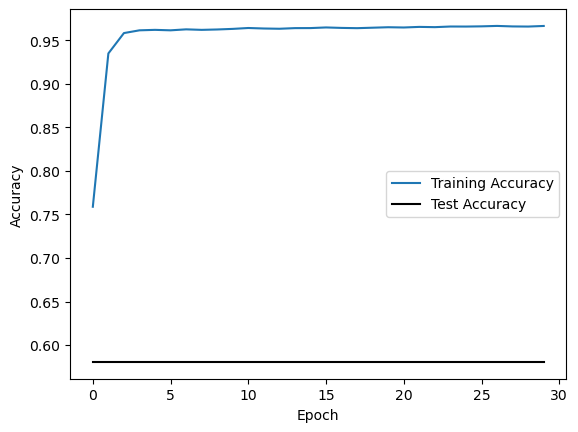


Evaluation against Test Dataset :
------------------------------------
268/268 [==============================] - 0s 1ms/step - loss: 0.7097 - accuracy: 0.5806


[0.7097278237342834, 0.5806413888931274]

In [27]:
# Train the model
# Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=32
#Set number of epochs
EPOCHS=30
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train_scaled,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training and Test Dataset :\n------------------------------------")
import matplotlib.pyplot as plt

# Evaluate the model against the test dataset
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plot accuracy of the model after each epoch on both training and test sets
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot([0, EPOCHS-1], [test_accuracy, test_accuracy], 'k-', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test_scaled,y_test)

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")



268/268 - 0s - loss: 0.7097 - accuracy: 0.5806 - 359ms/epoch - 1ms/step
Loss: 0.7097278237342834, Accuracy: 0.5806413888931274


In [31]:
# Export the model to HDF5 file
model.save('AlphabetSoupCharity_model_v2.h5')